In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
nodes = 6
gens = 2

gens_on_nodes = [0, 4]


fs = [lambda x : 0 for _ in range(nodes)]
fs[0] = lambda x: 0.67 * x[1] ** 2 + 26.24 * x[1] + 31.67
fs[4] = lambda x: 0.11 * x[1] ** 2 + 12.89 * x[1] + 6.78


dfs = [lambda x : np.zeros(len(x)) for _ in range(nodes)]
dfs[0] = lambda x: np.array([0, 2 * 0.67 * x[1] + 26.24])
dfs[4] = lambda x: np.array([0, 2 * 0.11 * x[1] + 12.89])

X = np.zeros((nodes, nodes))
X[0][1] = 0.6
X[0][2] = 0.6
X[1][3] = 0.1
X[2][4] = 0.1
X[3][4] = 0.1
X[0][5] = 0.1
X += X.T


B = -1/X

gens_bounds = [[20, 50], [200, 200]]
bounds_x = np.hstack(([[None]*nodes, [None]*nodes], gens_bounds))

np.nan_to_num(B, False, 0, 0, 0)


B = np.diag(B.sum(axis=0)) - B  # admittance matrix
print('B', np.round(B))

G = np.zeros((nodes, gens))  # G_ij == 1 => gen # j on i'th node
gen_index = 0 
for i in gens_on_nodes:
    G[i][gen_index] = 1
    gen_index += 1
        
# G[0][0] = 1
# G[4][1] = 1

demand = np.zeros(nodes) # power demand
demand[2] = demand[3] = 150
demand[5] = 10

Flows = [] 
for i in range(nodes):
    for j in range(i):
        if B[i][j] != 0:
            Flows.append([0] * nodes)
            Flows[-1][i] = -B[i][j]
            Flows[-1][j] = B[i][j]
            

Flows = np.array(Flows)           
           
print(Flows.shape)
print('Flows', np.round(Flows))

# matrix for | (\teta_i - \teta_j) / X_ij | \leq F^max_ij constraint           
F = np.hstack((Flows, np.zeros((Flows.shape[0], gens))))

fmax = np.array([150] * F.shape[0])  # max flow

# subsystems flows bounds:
# case-2 partition


# Extended Laplacian:
print('W0 (for 1D varible)', W0)
            
def f(x):
    p1, p2 = x[-gens:]
    return 0.67 * p1 ** 2 + 26.24 * p1 + 31.67 + 0.11 * p2 ** 2 + 12.89 * p2 + 6.78

def df(x):
    p1, p2 = x[-gens:]
    return [0]* nodes + [2 * 0.67 * p1 + 26.24, 2 * 0.11 * p2 + 12.89]

# As = 

B [[-13.   2.   2.   0.   0.  10.]
 [  2. -12.   0.  10.   0.   0.]
 [  2.   0. -12.   0.  10.   0.]
 [  0.  10.   0. -20.  10.   0.]
 [  0.   0.  10.  10. -20.   0.]
 [ 10.   0.   0.   0.   0. -10.]]
(6, 6)
Flows [[  2.  -2.   0.   0.   0.   0.]
 [  2.   0.  -2.   0.   0.   0.]
 [  0.  10.   0. -10.   0.   0.]
 [  0.   0.  10.   0. -10.   0.]
 [  0.   0.   0.  10. -10.   0.]
 [ 10.   0.   0.   0.   0. -10.]]
W0 (for 1D varible) [[ 3. -1. -1.  0.  0. -1.]
 [-1.  2.  0. -1.  0.  0.]
 [-1.  0.  2.  0. -1.  0.]
 [ 0. -1.  0.  2. -1.  0.]
 [ 0.  0. -1. -1.  2.  0.]
 [-1.  0.  0.  0.  0.  1.]]


/tmp/ipykernel_111015/348298839.py:26: RuntimeWarning: divide by zero encountered in true_divide
  B = -1/X


In [21]:
BG = np.hstack((B, -G)) # matrix for dc-power flow constraint
A = BG
b = -demand

C = np.vstack((F, -F))
d = np.hstack((fmax, fmax))

AC = np.vstack((A, C))
bd = np.hstack((b, d))



In [22]:
# Ax - b constraint, BG - equality-type, F - inequaltiy-type
# A = np.vstack((BG, F, -F)) 
# b = np.hstack((-demand, fmax, fmax))


x_dim = nodes + gens
# x0 = np.array([0] * nodes + [100, 100] )

x = np.zeros(x_dim)
num_cons = AC.shape[0]
y = np.zeros(num_cons)
W = np.kron(W0, np.diag(np.ones(y.size)))

z = np.zeros(np.shape(blowed_y))

h = 0.015

xs = []
x_s = []

bounds_y = [[None]*BG.shape[0] + [0] * (2 * F.shape[0]), [None]*AC.shape[0]]

def dLx(x, y):
    return df(x) + AC.T @ y

def dLy(x, y):
    return AC @ x - bd
                     
# def dLz(y, z):
#     return W @ y
    

def proj(x, bounds):
    a_min = [-np.inf if x is None else x for x in bounds[0]]
    a_max = [np.inf if x is None else x for x in bounds[1]]
    return np.clip(x, a_min, a_max)
    
def proj_x(x):
    return proj(x, bounds_x)

def proj_y(x):
    return proj(x, bounds_y)



# while not crit(x):
#     while not x_s or not np.allclose(sum(x_s)/ len(x_s), a0):
fs_log = []
fs_log_erg = []
cons = []
cons_erg = []
x_ergs = []
for k in range(5000):
    x_ = proj_x(x - h * dLx(x, y))
    x_s.append(x_)
    y_ = proj_y(y + h * dLy(x, y))
    
    
    x_ergs.append(x_ergs[-1] + x_ if k > 0 else x_)
    
    x = proj_x(x - h * dLx(x_, y_))
    y = proj_y(y + h * dLy(x_, y_))
    
    
    fs_log.append(f(x))
    x_erg = x_ergs[-1] / (k + 1)
    fs_log_erg.append(f(x_erg))
    cons.append(np.linalg.norm(np.hstack((A@ x - b, np.clip(C@x - d, 0, None)))))
    cons_erg.append(np.linalg.norm(np.hstack((A@ x_erg - b, np.clip(C@x_erg - d, 0, None)))))
    
    xs += [x]

    i += 1
#         print(sum(x_s) / len(x_s), x)
# print('iters:', i)
print(x, y, sep='\n')
print('grads')
# print(dLx(x,y), dLy(x,y), sep='\n')
# return i, x, y, z

np.array([np.round(BG @ x) , demand])

[-19.36836265   8.68399862  12.68399862  13.35553689   3.02220355
 -18.37737502 110.01438956 200.        ]
[173.77851014 173.57253673 173.57253673 173.55326105 173.55326105
 173.8173633    0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.        ]
grads


array([[   0.,   -0., -150., -150.,   -0.,  -10.],
       [   0.,    0.,  150.,  150.,    0.,   10.]])

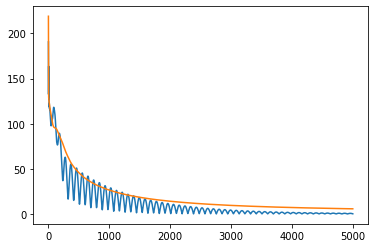

In [23]:
plt.plot(cons)
plt.plot(cons_erg, label='erg')
# plt.xlim(4000, None)
# plt.ylim(0, 10)

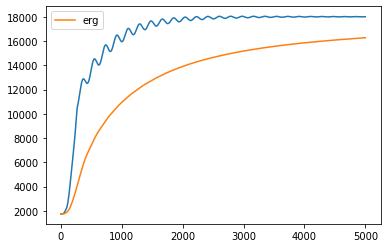

In [24]:
plt.plot(fs_log)
plt.plot(fs_log_erg, label='erg')
plt.legend()


In [25]:
from scipy.optimize import minimize, LinearConstraint, Bounds
x_dim = nodes + gens
bounds = Bounds([-np.pi * 20]*nodes + [20, 50], [np.pi * 20]*nodes + [200, 200])
x0 = np.array([0] * nodes + [100, 100] )

BG = np.hstack((B, -G))
dc_pf_constraint = LinearConstraint(BG, -D, -D) 
flow_constraint = LinearConstraint(F, -fmax, fmax) 

e1 = np.zeros(x_dim)
e1[0] = 1
teta_ref_constraint = LinearConstraint(e1, [0], [0]) 
res = minimize(f, x0, method='trust-constr', jac=df,
               constraints=[dc_pf_constraint, flow_constraint, teta_ref_constraint],
#                constraints=[flow_constraint],
               options={'verbose': 1, 'maxiter': 100}, bounds=bounds)

NameError: name 'D' is not defined

In [ ]:
res

In [ ]:
np.array([np.round(BG @ res.x) , D])

In [ ]:
dc_pf_constraint = {'type': 'eq', 'fun':lambda x : BG @ x + D, 'jac': lambda x:BG}
teta_ref_constraint = {'type': 'eq', 'fun':lambda x : e1 @ x, 'jac': lambda x:e1}
res = minimize(f, x0, method='SLSQP', jac=df,
               constraints=[dc_pf_constraint],
#                constraints=[flow_constraint],
                bounds=bounds)



In [ ]:
res

In [ ]:
np.array([np.round(BG @ res.x) , D])

In [ ]:
np.round(BG[:,:].sum(axis=0)) , -D.sum()

In [ ]:
np.diag(X.sum(axis=1))